# Self Organizing Maps

In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [28]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [29]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

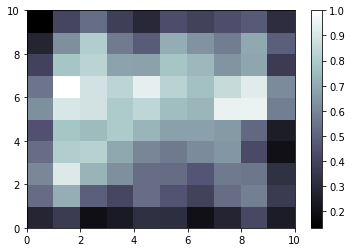

In [30]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

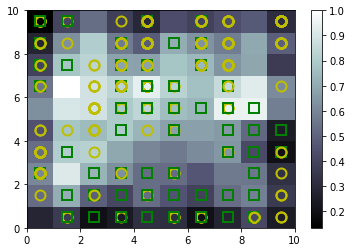

In [31]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['y', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [44]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(0,3)], mappings[(1,0)], mappings[(3,2)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15706762.0
15672894.0
15783883.0
15756538.0
15651868.0
15716082.0
15651460.0
15672637.0
15769548.0
15742009.0
15752344.0
15736533.0
15779207.0
15611409.0
15752578.0
15636454.0
15615296.0
15805261.0
15715750.0
15789201.0
15704081.0
15723884.0
15677112.0
15778290.0
15701081.0
15671582.0
15722479.0
15810723.0
15730360.0
15751137.0
15664083.0
15690898.0
15640521.0
15703177.0
15659031.0
15733602.0
15706602.0
15728082.0
15801817.0
15693382.0
15768449.0
15725002.0
15752601.0
15632669.0
15740356.0
15799785.0
15800049.0
15781574.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialized with PCA.
The map will be trained with the online algorithm.
Training SOM... done!


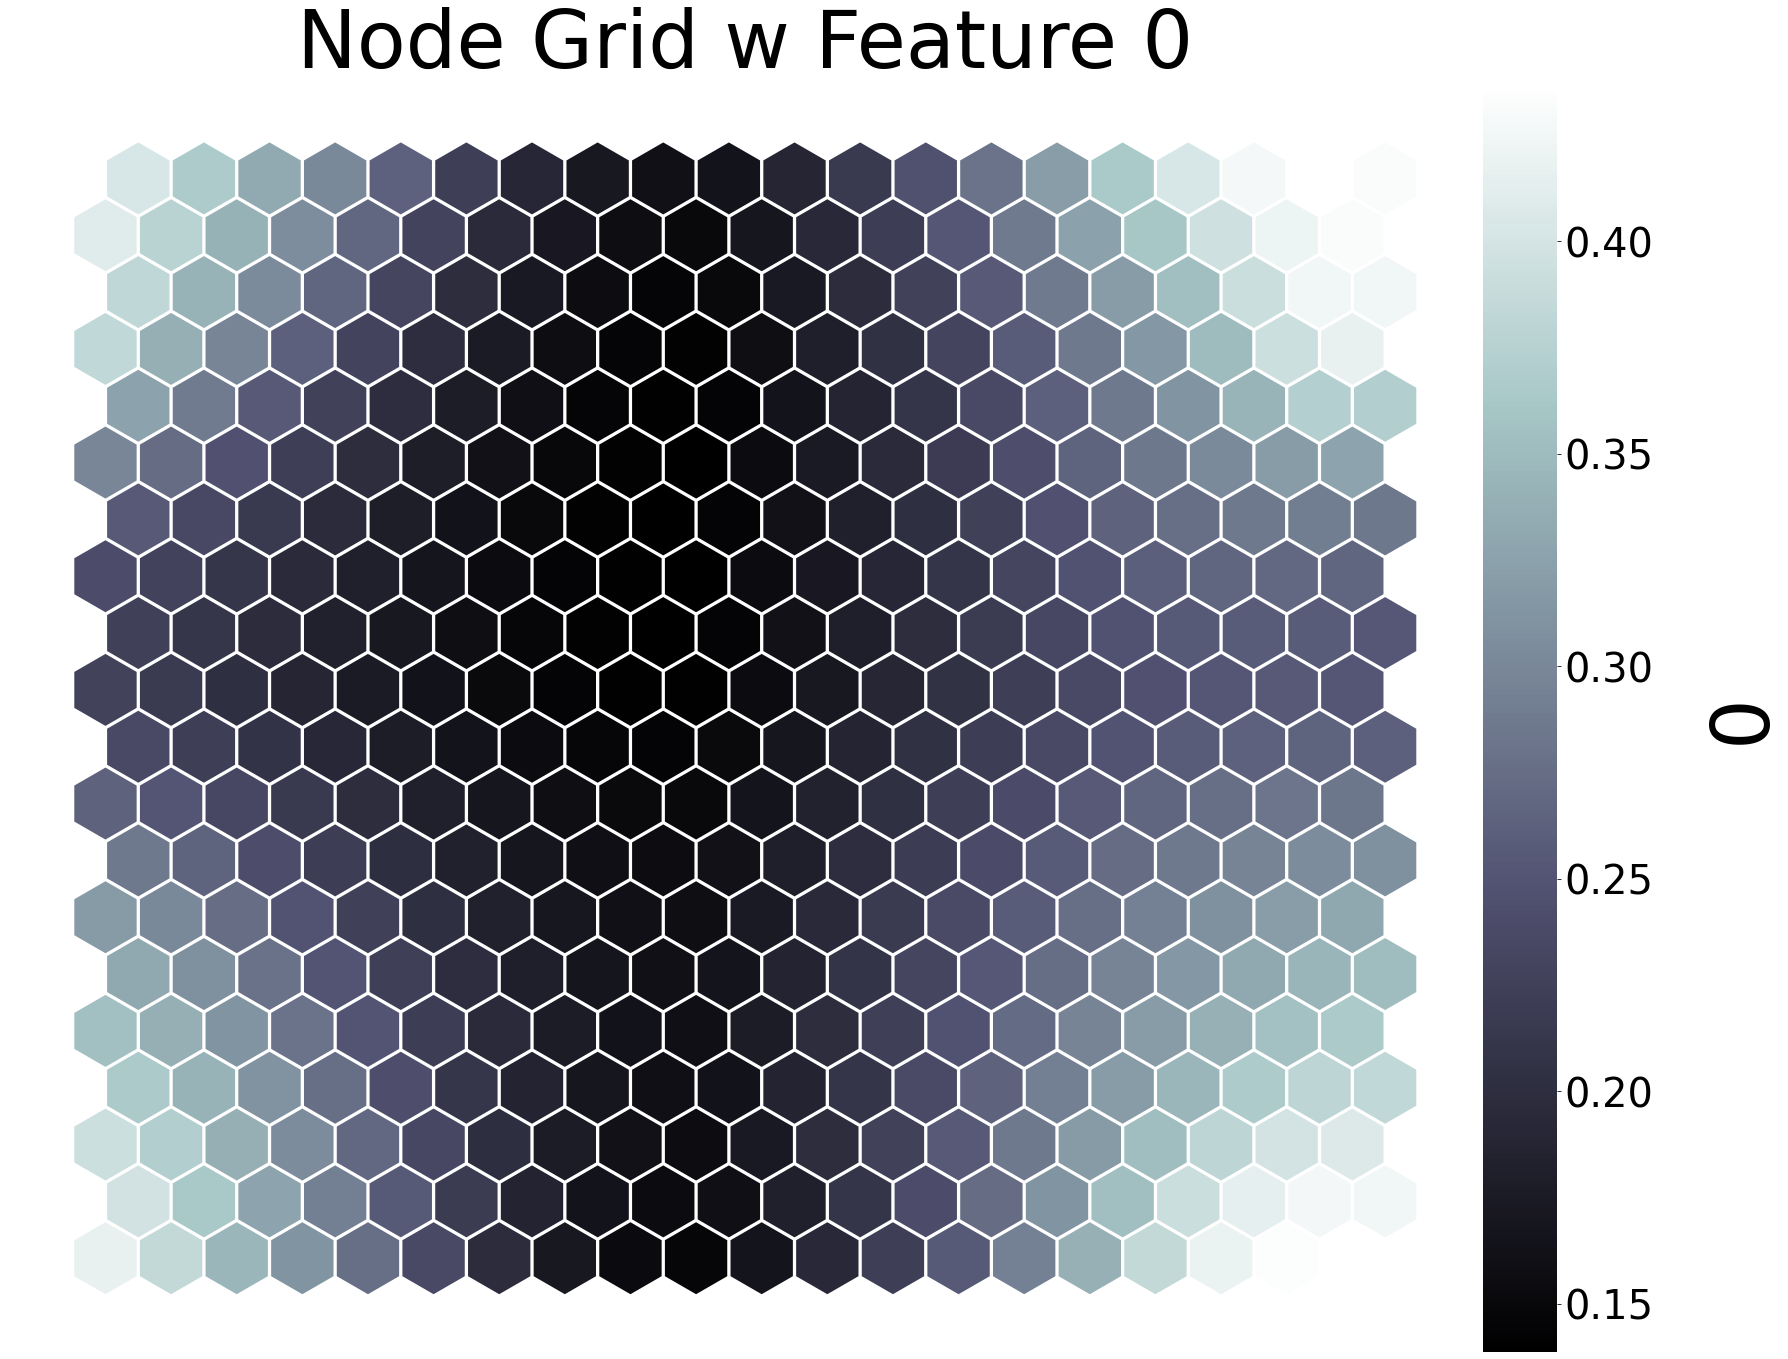

In [36]:
#%pip install SimpSOM
import pandas as pd
import simpsom as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.SOMNet(20, 20, X, PBC=True)
net.train(train_algo='online', epochs=200)
net.save('filename_weights')
net.nodes_graph(colnum=0)

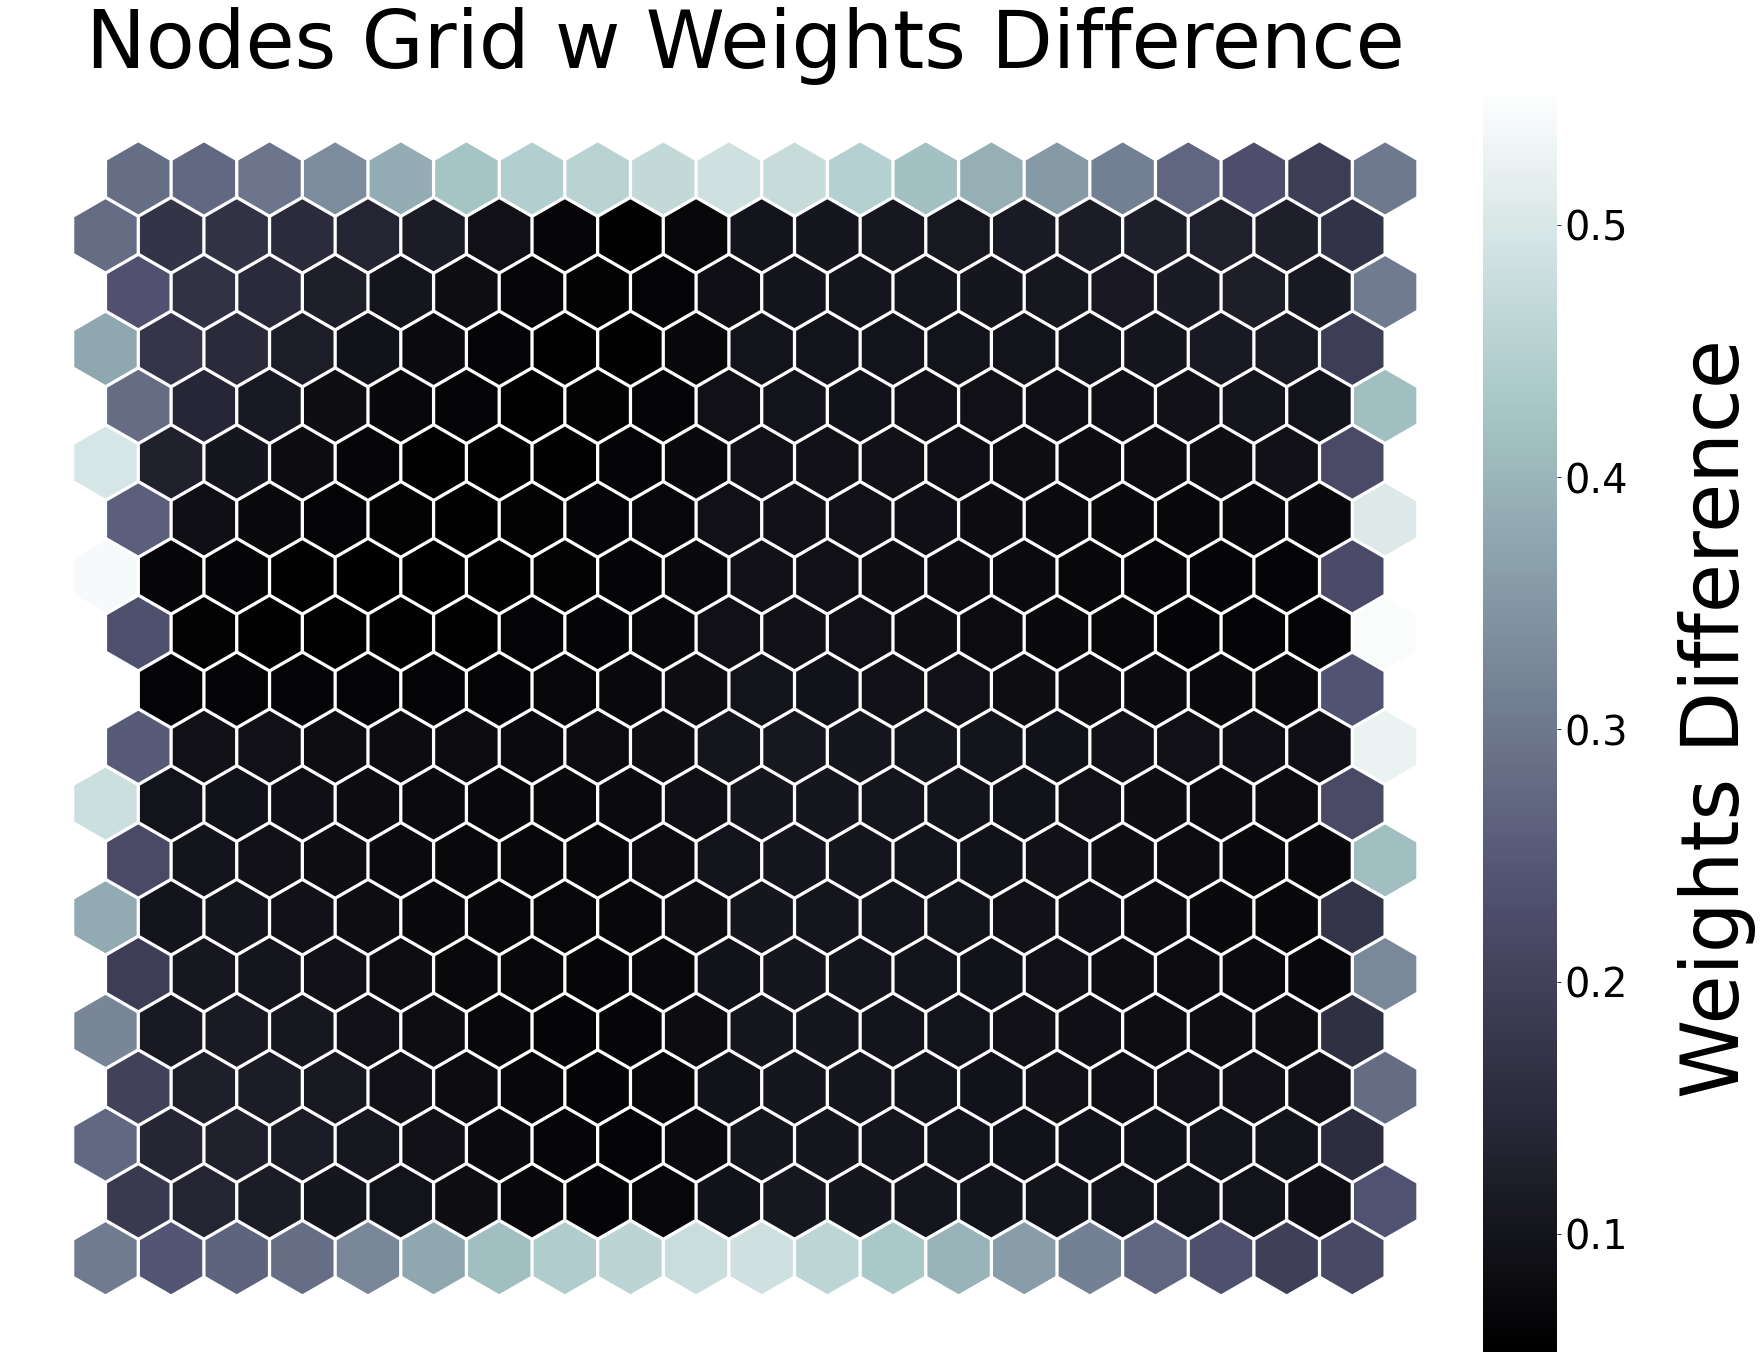

In [37]:
net.diff_graph()

In [38]:
#Project the datapoints on the new 2D network map.
net.project(X)

[[2.0, 0.0],
 [3.5, 16.454482671904337],
 [5.0, 0.0],
 [17.0, 0.0],
 [19.0, 15.588457268119896],
 [19.0, 13.856406460551021],
 [0.5, 4.330127018922194],
 [19.0, 13.856406460551021],
 [0.5, 4.330127018922194],
 [17.0, 0.0],
 [19.0, 0.0],
 [19.0, 0.0],
 [19.0, 0.0],
 [19.0, 0.0],
 [2.0, 0.0],
 [0.5, 4.330127018922194],
 [19.0, 0.0],
 [19.0, 13.856406460551021],
 [0.0, 5.196152422706632],
 [19.0, 13.856406460551021],
 [3.5, 16.454482671904337],
 [16.0, 0.0],
 [0.0, 5.196152422706632],
 [0.0, 15.588457268119896],
 [0.5, 4.330127018922194],
 [19.0, 0.0],
 [0.0, 5.196152422706632],
 [19.0, 0.0],
 [19.0, 13.856406460551021],
 [19.0, 0.0],
 [19.0, 0.0],
 [3.0, 0.0],
 [18.0, 0.0],
 [19.0, 0.0],
 [19.5, 0.8660254037844388],
 [0.5, 16.454482671904337],
 [17.0, 0.0],
 [19.0, 0.0],
 [18.0, 0.0],
 [18.0, 0.0],
 [19.5, 16.454482671904337],
 [3.0, 0.0],
 [19.5, 16.454482671904337],
 [19.0, 0.0],
 [0.5, 16.454482671904337],
 [18.0, 0.0],
 [4.5, 16.454482671904337],
 [0.0, 3.4641016151377553],
 [3.5, 16

<Figure size 432x288 with 0 Axes>

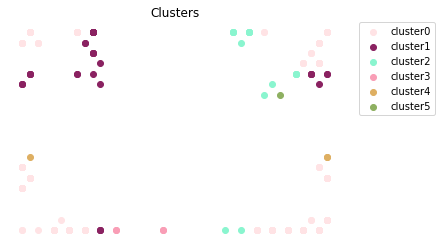

[[0,
  1,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  83,
  84,
  85,
  86,
  87,
  88,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  123,
  124,
  125,
  126,
  127,
  129,
  130,
  132,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  168,
  169,
  17

<Figure size 432x288 with 0 Axes>

In [42]:
#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(X, clus_type='qthresh', show=1)	